<a href="https://colab.research.google.com/github/alonso0912/Codigo_qr/blob/main/mineria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 67.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 88.9 MB/s eta 0:00:00


2025-11-09 18:53:14.366 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-09 18:53:14.368 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-09 18:53:14.507 
  command:

    streamlit run /usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-11-09 18:53:14.508 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-09 18:53:14.510 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-09 18:53:14.515 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-09 18:53:14.518 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when runn

DeltaGenerator()

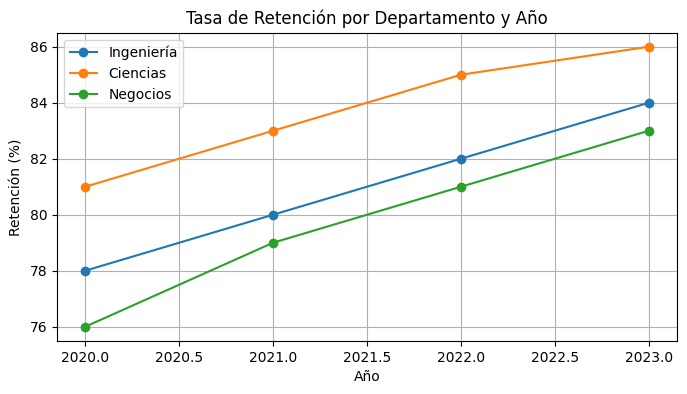

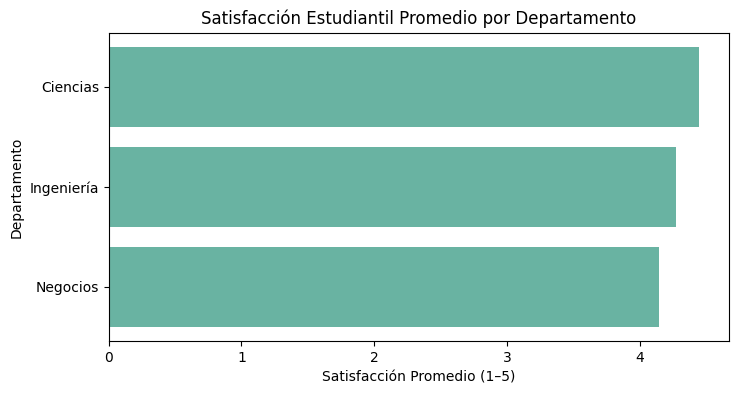

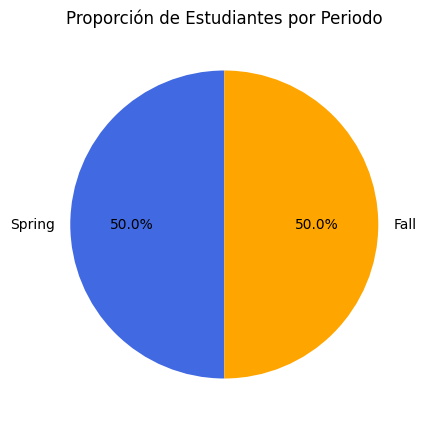

In [ ]:
import pandas as pd
import streamlit as st
import matplotlib.pyplot as plt

# Configuración general
st.set_page_config(page_title="Dashboard Universitario", layout="wide")
st.title("📊 Dashboard de Retención y Satisfacción Estudiantil")

# Simulamos un dataset universitario
data = {
    "Year": [2020, 2020, 2020, 2021, 2021, 2021, 2022, 2022, 2022, 2023, 2023, 2023],
    "Department": ["Ingeniería", "Ciencias", "Negocios"] * 4,
    "Term": ["Spring", "Fall"] * 6,
    "RetentionRate": [0.78, 0.81, 0.76, 0.80, 0.83, 0.79, 0.82, 0.85, 0.81, 0.84, 0.86, 0.83],
    "SatisfactionScore": [4.1, 4.3, 4.0, 4.2, 4.4, 4.1, 4.3, 4.5, 4.2, 4.5, 4.6, 4.3]
}
df = pd.DataFrame(data)

# 🎛️ Filtros interactivos
st.sidebar.header("Filtros")
year = st.sidebar.multiselect("Selecciona Año(s)", sorted(df["Year"].unique()), default=df["Year"].unique())
department = st.sidebar.multiselect("Selecciona Departamento(s)", df["Department"].unique(), default=df["Department"].unique())
term = st.sidebar.multiselect("Selecciona Periodo(s)", df["Term"].unique(), default=df["Term"].unique())

# Aplicar filtros
df_filtered = df[(df["Year"].isin(year)) & (df["Department"].isin(department)) & (df["Term"].isin(term))]

# 📈 KPIs
avg_retention = df_filtered["RetentionRate"].mean() * 100
avg_satisfaction = df_filtered["SatisfactionScore"].mean()
max_retention = df_filtered["RetentionRate"].max() * 100

col1, col2, col3 = st.columns(3)
col1.metric("Tasa promedio de retención", f"{avg_retention:.1f}%")
col2.metric("Puntaje promedio de satisfacción", f"{avg_satisfaction:.2f}/5")
col3.metric("Máxima tasa de retención", f"{max_retention:.1f}%")

st.markdown("---")

# 📊 Visualización 1: Tendencia de Retención por Año
st.subheader("📈 Tendencia de Tasa de Retención por Año")
fig1, ax1 = plt.subplots(figsize=(8, 4))
for dept in df_filtered["Department"].unique():
    df_dept = df_filtered[df_filtered["Department"] == dept]
    ax1.plot(df_dept["Year"], df_dept["RetentionRate"] * 100, marker="o", label=dept)
ax1.set_title("Tasa de Retención por Departamento y Año")
ax1.set_xlabel("Año")
ax1.set_ylabel("Retención (%)")
ax1.legend()
ax1.grid(True)
st.pyplot(fig1)

# Visualización 2: Comparación de Satisfacción por Departamento
st.subheader(" Comparación de Satisfacción Estudiantil por Departamento")
fig2, ax2 = plt.subplots(figsize=(8, 4))
df_grouped = df_filtered.groupby("Department")["SatisfactionScore"].mean().sort_values()
ax2.barh(df_grouped.index, df_grouped.values, color="#69b3a2")
ax2.set_xlabel("Satisfacción Promedio (1–5)")
ax2.set_ylabel("Departamento")
ax2.set_title("Satisfacción Estudiantil Promedio por Departamento")
st.pyplot(fig2)

# Visualización 3: Distribución por Periodo (Spring/Fall)
st.subheader(" Distribución de Registros por Periodo Académico")
fig3, ax3 = plt.subplots(figsize=(5, 5))
term_counts = df_filtered["Term"].value_counts()
ax3.pie(term_counts, labels=term_counts.index, autopct="%1.1f%%", startangle=90, colors=["#4169E1", "#FFA500"])
ax3.set_title("Proporción de Estudiantes por Periodo")
st.pyplot(fig3)

# Datos en pestañas
tab1, tab2 = st.tabs(["📄 Datos filtrados", "📚 Datos completos"])
with tab1:
    st.dataframe(df_filtered.reset_index(drop=True), use_container_width=True)
with tab2:
    st.dataframe(df, use_container_width=True)

st.caption("Usa los filtros de la izquierda para explorar los datos por año, departamento o periodo académico.")
